# D

# Load Data

In [1]:
# Sleeve Stress Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from pathlib import Path

file_name = 'Testinfo.xlsx'

#Save Sensor ID infomration
xl_file = pd.ExcelFile(file_name)
tabnames=xl_file.sheet_names

data=xl_file

sleeveid=xl_file.parse(sheet_name=data.sheet_names[0], skiprows=0)
sheet=sleeveid

sleeveid.set_index(keys='SleeveID')
slmelt=sleeveid.melt('SleeveID', var_name="Pos ID",value_name="Location").dropna()
slmelt.head()

# library & dataset
import seaborn as sns
df=slmelt
     
# --- Use the 'palette' argument of seaborn
sns.lmplot( y="Location", x="SleeveID", data=df, fit_reg=False, hue='Pos ID', legend=False, palette="Set1")
plt.legend(loc='lower right',frameon=True)
plt.ylim(ymax=2700) 
# --- Use a handmade palette
#flatui = ["#9b59b6", "#3498db", "orange"]
#sns.set_palette(flatui)
#sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)

df.head()

,SleeveID,Pos ID,Location
0,3,A,360.0
1,4,A,360.0
2,5,A,538.0
3,6,A,589.0
4,7,A,264.0


# Load Runinfo

In [2]:
runinfo=xl_file.parse(sheet_name=data.sheet_names[1], skiprows=0)
sheet=runinfo

runinfo.set_index(['Run','SleeveID'],inplace=True)
#slmelt=runinfo.melt('SleeveID', var_name="Pos ID",value_name="Location").dropna()
#slmelt.head()

runinfo.head(8)

Location
Run SleeveID         
2   5              R1
    6              R2
    7              R3
    8              R4
    9              R5
3   5              R6
    6              R7
    7              R8

# Create Data

In [190]:
#df=pd.DataFrame({'t': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
df=pd.DataFrame({'t': range(1,11)})
# create list of all of all sleeveID in Run 2

#runinfo.loc[runinfo['Run']=='2'].head()
qry=runinfo.query('Run ==2')
#for tpl in qry.index.values
#    slvid=tpl[1]
#    name=sl
#    df.
df.set_index(['t'],inplace=True)

for num in range(2):
    labely = (str(num),'A','y')
    labelx = (str(num),'A','x')
    labelbx = (str(num),'B','x')
    labelby = (str(num),'B','y')
    df[labelx]= np.random.randn(10)
    df[labelbx]= np.random.randn(10)
    df[labely]= np.random.randn(10)+range(1,11)
    df[labelby]= np.random.randn(10)+range(1,11)
#    if num==1:
#        labelcx = (str(num),'C','x')
#        df[labelcx]= np.random.randn(10)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['ID','Location','Direction']) 
df.head()

ID                0                                       1            \
Location          A         B         A         B         A         B   
Direction         x         x         y         y         x         x   
t                                                                       
1         -0.357243 -1.448660  0.626862  1.263340 -1.181431  0.830443   
2          0.001339 -1.554643  2.688443  2.546066  1.528178 -1.789914   
3          1.102636  0.368306  3.183072  2.411255  0.216261 -0.499207   
4         -1.686344 -0.961375  3.312330  4.863844 -0.832781 -0.407241   
5         -0.045489  1.694324  5.635525  2.672361  2.472686 -1.699761   

ID                             
Location          A         B  
Direction         y         y  
t                              
1          0.391143  1.714780  
2          2.226304  2.576756  
3          3.376475  3.578132  
4          3.290755  5.025665  
5          4.204246  6.885869

In [156]:
#df[('0','A','tot')]=(df[('0','A','y')]**2+df[('0','A','x')]**2)**.5
df.sort_index(level='ID',axis=1,inplace=True)
df.head()

ID                0                                       1            \
Location          A                   B                   A             
Direction         x         y         x         y         x         y   
t                                                                       
1         -1.227306 -0.352367 -1.074712  0.950599  2.049091 -1.137958   
2          0.435749  1.875672 -0.542973  2.173065  1.189910  1.617822   
3          1.459270  1.577529  1.266987  2.342970  0.302045  0.965573   
4         -0.973236  3.109770  0.373820  3.185566 -1.070420  3.030276   
5         -0.299307  5.266175  0.233385  4.766137 -0.453633  3.745953   

ID                             
Location          B            
Direction         x         y  
t                              
1         -1.262021 -0.035763  
2          0.389261  4.453446  
3          0.912475  3.470259  
4         -0.954048  3.519959  
5         -0.771288  4.310860

,t,y1,y2,y3,y4,y5,y6,y7,y8
0,1,0.664962,0.473568,11.135602,7.063756,2.729407,2.942622,4.651326,4.702956
1,2,-0.348460,1.125050,9.872597,5.903379,4.126279,3.589777,7.307345,5.012936
2,3,-0.693993,2.596259,15.190237,7.711805,6.604484,2.822751,6.932511,5.128879
3,4,0.168915,4.933867,15.821387,8.649856,6.050852,4.590900,6.709924,8.022049
4,5,0.949917,3.919228,15.670560,11.126570,6.893430,6.497560,9.204736,8.159551


In [191]:
#df=df.stack(level='Direction')

for id,loc,dir in df.columns.values:
    df[(id,loc,'tot')]=(df[(id,loc,'x')]**2+df[(id,loc,'y')]**2)**.5
df.sort_index(level='ID',axis=1,inplace=True)
df.head()

ID                0                                                    \
Location          A                             B                       
Direction       tot         x         y       tot         x         y   
t                                                                       
1          0.721511 -0.357243  0.626862  1.922145 -1.448660  1.263340   
2          2.688443  0.001339  2.688443  2.983181 -1.554643  2.546066   
3          3.368643  1.102636  3.183072  2.439222  0.368306  2.411255   
4          3.716892 -1.686344  3.312330  4.957945 -0.961375  4.863844   
5          5.635708 -0.045489  5.635525  3.164214  1.694324  2.672361   

ID                1                                                    
Location          A                             B                      
Direction       tot         x         y       tot         x         y  
t                                                                      
1          1.244496 -1.181431  0.391143  1.905284  0.830443  1.714780  
2          2.700326  1.528178  2.226304  3.137430 -1.789914  2.576756  
3          3.383394  0.216261  3.376475  3.612788 -0.499207  3.578132  
4          3.394495 -0.832781  3.290755  5.042138 -0.407241  5.025665  
5          4.877485  2.472686  4.204246  7.092558 -1.699761  6.885869

# Interactive list

In [44]:
qry=runinfo.query('Run ==2')
x=qry.index.values
tpl=x[1]
nm=tpl[1]
string='y'+str(nm)
print (string)

y6


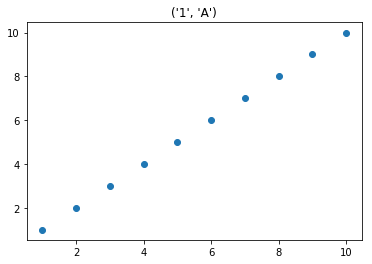

In [223]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

colnames={}
prevname=''
for id,loc,_ in df.columns.values:
    name=str(id)+loc
    if(prevname!=name):
        nametupl=(id,loc)
        colnames[name]=nametupl
        prevname=name
def plot_func(titles):
    plt.scatter(x=df.index.values,y=df.index.values)
    plt.title(titles)
    plt.show()

#interact(f, x=['apples','oranges']);
interact(plot_func, titles=colnames);


In [219]:
df.index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

# Plot data

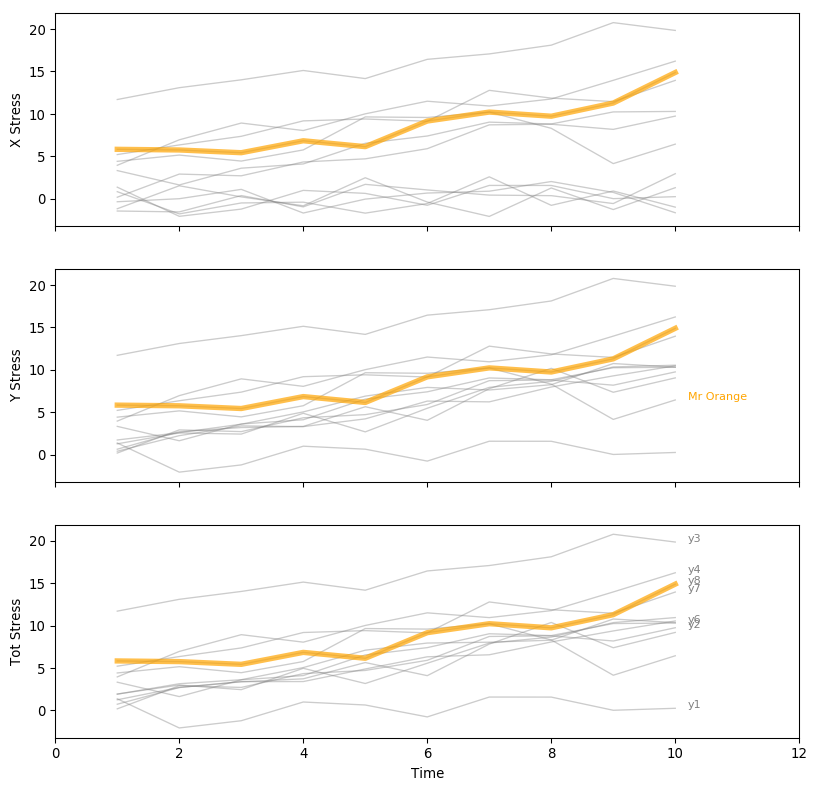

In [226]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np

dfy=pd.DataFrame({'t': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })

#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.close('all')


figprops = dict(figsize=(960/my_dpi, 960/my_dpi), dpi=my_dpi)
#fig = plt.figure(**figprops)

fig, (ax, bx,totx) = plt.subplots(nrows=3,sharex=True,sharey=True,**figprops)

# multiple line plot
for column in dfy.drop('t', axis=1):
    ax.plot(dfy['t'], dfy[column], marker='', color='grey', linewidth=1, alpha=0.4)
    bx.plot(dfy['t'], dfy[column], marker='', color='grey', linewidth=1, alpha=0.4)
    totx.plot(dfy['t'], dfy[column], marker='', color='grey', linewidth=1, alpha=0.4)

for key, value in colnames.items():
    id,loc=value
    
    ax.plot(df.index.values, df[(id,loc,'x')], marker='', color='grey', linewidth=1, alpha=0.4)
    bx.plot(df.index.values, df[(id,loc,'y')], marker='', color='grey', linewidth=1, alpha=0.4)
    totx.plot(df.index.values, df[id,loc,'tot'], marker='', color='grey', linewidth=1, alpha=0.4)   



# Now re do the interesting curve, but biger with distinct color
ax.plot(dfy['t'], dfy['y8'], marker='', color='orange', linewidth=4, alpha=0.7)
bx.plot(dfy['t'], dfy['y8'], marker='', color='orange', linewidth=4, alpha=0.7)
totx.plot(dfy['t'], dfy['y8'], marker='', color='orange', linewidth=4, alpha=0.7)

# And add a special annotation for the group we are interested in

bx.text(10.2, dfy.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')


# Let's annotate the plot
num=0
for i in dfy.values[9][1:]:
   num+=1
   name=list(dfy)[num]
   if name != 'y5':
      totx.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')


# Configure Axis Limits
ax.set_xlim(0,12)  
        
# Label Axis        
ax.set_ylabel("X Stress")   
bx.set_ylabel("Y Stress")   
totx.set_ylabel("Tot Stress") 
totx.set_xlabel("Time")
plt.show()